**아래 링크를 통해 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있음**

<pre>
<a target="_blank" href="https://nbviewer.jupyter.org/github/KimDaeHo26/python/blob/main/KDHexcel.ipynb"><img src="https://jupyter.org/assets/main-logo.svg" width="28" />주피터 노트북 뷰어로 보기</a>
<a target="_blank" href="https://colab.research.google.com/github/KimDaeHo26/python/blob/main/KDHexcel.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
</pre>

# 엑셀파일 생성 / 재무산식 계산

<pre>
엑셀프로그램을 구동 시켜 엑셀의 메크로 함수를 호출하여 
tuple, list, pandas.Dataframe, numpy.ndarray, image파일, matplotlib.pyplot 을 넣어주는 프로그램임

사용환경 : windows, MS_Office 설치된 환경
설치방법 : pip install KDHexcel

포함 class
KDHcalc   :  재무산식 계산 프로그램
KDHexcel  :  엑셀 파일 생성 프로그램
</pre>

In [4]:
# 주피터 노트북에서 설치 : 코랩 에서도 설치 가능
!pip install KDHexcel --upgrade

Requirement already up-to-date: KDHexcel in c:\programdata\anaconda3\lib\site-packages (0.0.1.1)


## 재무산식 계산 프로그램 ( KDHcalc )

In [29]:
import pandas as pd
from KDHexcel import KDHcalc
import os.path as path
# 재무데이터 로드
path = ("https://raw.githubusercontent.com/"
        "KimDaeHo26/python/main/{}.csv")

로컬여부 = 'N'
if 로컬여부 == 'Y' : 
    jemu_file = './jemu.csv'
else : 
    jemu_file = path.format('jemu')

df = pd.read_csv(jemu_file, index_col=0)

# 한개 업체만 선택
try:
    upche = df.loc[int('380725')]
except KeyError:
    try:
        upche = df.loc['380725']
    except KeyError:
        print("해당하는 업체가 없습니다.")
        sys.exit()

# 산식처리 클래스 선언
calc = KDHcalc.KDHcalcClass()

# 단건
fmul = '&11-1000C&+(&11-2000B&)+100'
a = calc.calc(upche,fmul,20201231,20191231,20181231)
print('단건 => ',a,'\n','-'*50)

# 산식을 값으로 변경한 결과
fmul = 'if(or(&11-9000C&>0,&11-9000B&<0),max(log(3,2),1),&11-9000C&)'
a = calc.calc(upche,fmul,20201231,20191231,20181231,'n')
print('산식을 값으로 변경한 결과 => ',a,'\n','-'*50)

# 산식 설정 : 스트링을 csv 파일처럼 인식하여 로드 함
from io import StringIO
csv_data = \
    '''bogosu|hang|fmul
    19|1000|if(&11-2000C&<0,1,&11-9000B&)
    19|2000|&11-9000C&
    19|3000|&11-9000B&
    19|1000|if(or(&11-9000C&<0,&11-9000B&<0,&11-9000B&<0),max(log(3,2),1),&11-9000C&)
    19|1000|if(and(&11-9000C&<0,&11-9000B&<0),1,100)'''
df = pd.read_csv(StringIO(csv_data), sep="|")


# 계산 하여 amt 컬럼에 넣어 줌 : 한꺼번에 처리
df['amt'] = df['fmul'].apply(lambda fmul : calc.calc(upche, fmul, '20201231', 20191231, 20181231))
# 산식 컬럼을 삭제
del df['fmul']

## 계산 하여 amt 컬럼에 넣어 줌 : for 루프로 단건씩 처리
# for i in range(0,df['fmul'].count()) :
#     df['amt'][i] = calc.calc(upche,df['fmul'][i],'20201231',20191231,20181231)
# del df['fmul'] # 컬럼을 삭제

print(df.head())

# # 엑셀 파일로 저장
# pdE = pd.ExcelWriter('result1.xlsx')
# df.to_excel(pdE)
# pdE.save()


단건 =>  72659080100.0 
 --------------------------------------------------
산식을 값으로 변경한 결과 =>  self.KDHif(self.KDHor(230000000000.0>0,216000000000.0<0),max(math.log(3,2),1),230000000000.0) 
 --------------------------------------------------
   bogosu  hang           amt
0      19  1000  2.160000e+11
1      19  2000  2.300000e+11
2      19  3000  2.160000e+11
3      19  1000  2.300000e+11
4      19  1000  1.000000e+02


## 엑셀 파일 생성 프로그램 ( KDHexcel )

0.0.1.2
Help on method 셀값넣기 in module KDHexcel.KDHexcel:

셀값넣기(셀='A1', 값='1', 시트명=None) method of KDHexcel.KDHexcel.KDHexcel instance
    :param 셀 : 저장될 셀위치 (예 : B3)
    :param 값 : 셀에 들어갈 값 (1개의 값 또는 tuple, list, pandas.Dataframe, numpy.ndarray)
    :param 시트명 : 입력하면 해당 시트에 입력 안하면 첫번째 시트에 값이 들어감
    :return: 없음

Help on method 이미지파일넣기 in module KDHexcel.KDHexcel:

이미지파일넣기(셀, 파일명, ColumnWidth=50, RowHeight=150, 시트명=None) method of KDHexcel.KDHexcel.KDHexcel instance
    :param 셀 : 저장될 셀위치 (예 : B3)
    :param 파일명: 이미지 파일명 (예 : 'C:\Users\User\파이썬주피터\plot3.png' )
    :param 시트명 : 입력하면 해당 시트에 입력 안하면 첫번째 시트에 값이 들어감
    :param ColumnWidth : 셀의 너비
    :param RowHeight : 셀의 높이
    :return: 없음

Help on method 그래프넣기 in module KDHexcel.KDHexcel:

그래프넣기(셀, plt, ColumnWidth=50, RowHeight=150, 시트명=None) method of KDHexcel.KDHexcel.KDHexcel instance
    QApplication.clipboard 를 사용 주피터 노트북에서는 실행이 안됨
    :param 셀: 저장될 셀위치 (예 : B3)
    :param plt: 그래프 object (예 :  matplotlib.pyplot )
    :param 시트명 : 입력하

AttributeError: 'NoneType' object has no attribute 'setImage'

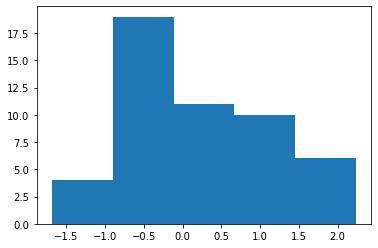

In [3]:
from KDHexcel import KDHexcel

exc = KDHexcel.KDHexcel()
print(exc.__version__)

help(exc.셀값넣기)
help(exc.이미지파일넣기)
help(exc.그래프넣기)
help(exc.셀값지우기)

# 직접 VBA 코드를 이용할 수 있음 (exc.excel 이 엑셀 application 임)
exc.excel.Activesheet.Range("A1").Value = 15

# 첫번째 시트에 1개의 값 넣어줌
exc.셀값넣기(셀="A1", 값="첫번째시트")

# 테스트 시트에 1개의 값 넣어줌
exc.셀값넣기(셀="A1", 값="abcdef", 시트명="테스트")
exc.셀값넣기("B1",5.15,"테스트")

# 튜플 시트에 tuple 데이터 넣어줌
t1 = ("튜플a","튜플b","튜플c","튜플d")
exc.셀값넣기("B3",t1,"튜플")

# 리스트11 시트에 list 데이터 넣어줌
l1 = ["리스트1","리스트2","리스트3"]
exc.셀값넣기("A3",l1,"리스트11")

# 리스트2 시트에 2차원 list 데이터 넣어줌
l2 = [ ["리스트21","리스트22","리스트23"],
       ["리스트1","리스트2","리스트3"],
     ]
exc.셀값넣기("A1",l2,"리스트2")

# pandas 데이터셋 넣어줌
import pandas as pd
a = [["a1","b1"],["c1","d1"]]
p1 = pd.DataFrame(a, index=list('ab'), columns=list('de'))
exc.셀값넣기("A1",p1,"판다스")

# numpy array 넣어줌
import numpy as np
lst1 = [1, 2, 3, 4, 5, 6]
넘파이 = np.array(lst1)
exc.셀값넣기("a1",넘파이,"넘파이")

lst2 = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
넘파이 = np.array(lst2)
exc.셀값넣기("b3",넘파이,"넘파이")

# 이미지파일 넣어줌
exc.이미지파일넣기("d4", 시트명="이미지", 파일명=r"C:\Users\User\파이썬주피터\plot3.png",ColumnWidth=50, RowHeight=150)

# matplotlib.pyplot 넣어줌
import matplotlib.pyplot as plt
# 샘플그래프 그리기 시작
import numpy as np
a = np.random.normal(size=50)
plt.hist(a, bins=5)
# 샘플그래프 그리기 끝

exc.그래프넣기("f8",plt,ColumnWidth=30, RowHeight= 130, 시트명="그래프")

a = [[1,2],[2,4],[3,3]]
p1 = pd.DataFrame(a, index=list('abc'), columns=list('de'))
p1.plot.line(x='d',y='e')

exc.그래프넣기("a1",plt,ColumnWidth=30, RowHeight= 130, 시트명="그래프")

exc.셀값넣기(셀="A1", 값=[1,2,3,4,5,6], 시트명="셀값지우기")
exc.셀값지우기(셀="B1:D1", 시트명="셀값지우기")



# 설치시 포함된 테스트 파일 (재무산식 계산)
import KDHexcel.KDHcalcTest
# 설치시 포함된 테스트 파일 (엑셀생성)
import KDHexcel.KDHexcelTest